In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

In [2]:
gtd = pd.read_csv('Resource/Global_Terrorism.csv', encoding='ISO-8859-1')
gtd.head()

//anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,1.970010e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,1.970010e+11,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,1.970010e+11,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


# Most Common Type of Attacks

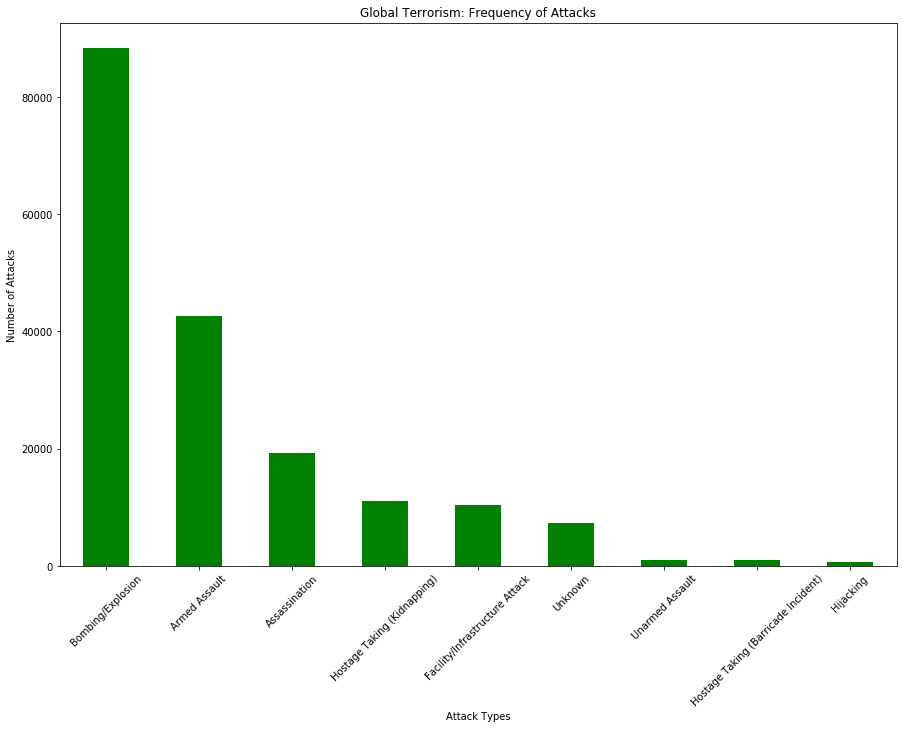

In [22]:
Attack_Type = gtd["attacktype1_txt"].unique()
Attack_Count = gtd["attacktype1_txt"].value_counts()

Attack_Count.plot(kind="bar", facecolor = "green", align="center", figsize=(15,10))

plt.xlabel("Attack Types")
plt.ylabel("Number of Attacks")
plt.title("Global Terrorism: Frequency of Attacks")

plt.xticks(rotation=45)

plt.savefig("Images/AttackTypeBar1.png")

plt.show()

# Trend in Type of Attacks

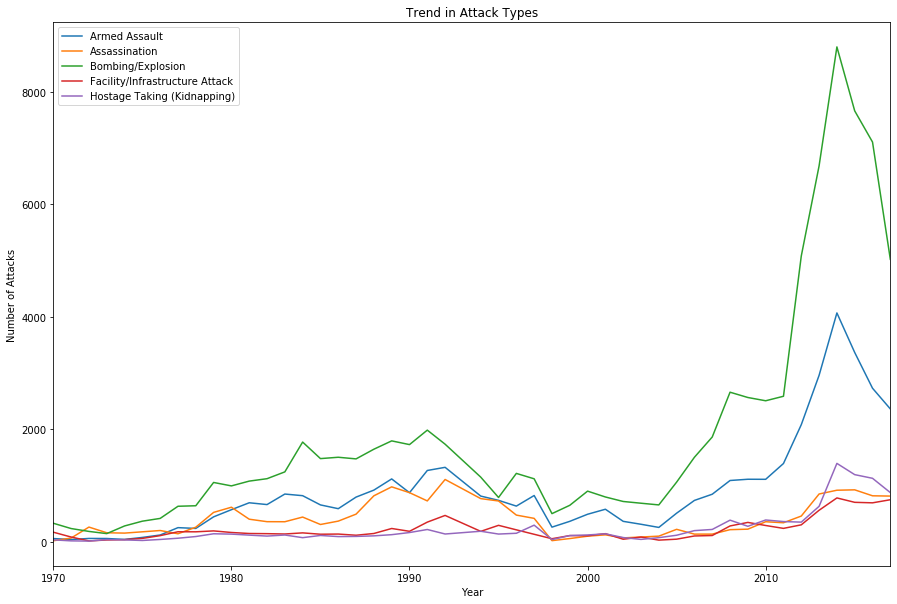

In [23]:
AttackTrend = pd.DataFrame(gtd, columns = ["eventid", "attacktype1_txt", "iyear"])

Attack_Count = AttackTrend.groupby(["attacktype1_txt"]).count()
Attack_Count = AttackTrend.sort_values(by="eventid", ascending=False)

Attack_Count = AttackTrend[AttackTrend["attacktype1_txt"].isin(["Bombing/Explosion", "Armed Assault", "Assassination", "Hostage Taking (Kidnapping)","Facility/Infrastructure Attack"])]
Attack_Count = Attack_Count.groupby(["attacktype1_txt", "iyear"]).count()
Attack_Count = Attack_Count.reset_index()

Attack_Count.pivot(index="iyear", columns="attacktype1_txt", values="eventid").plot(figsize=(15,10))

plt.ylabel("Number of Attacks")
plt.xlabel("Year")
plt.title("Trend in Attack Types")
plt.legend(title="")

plt.savefig("Images/AttackTypeLine1.png")

plt.show()

# Most Popular Type of Attack by Region

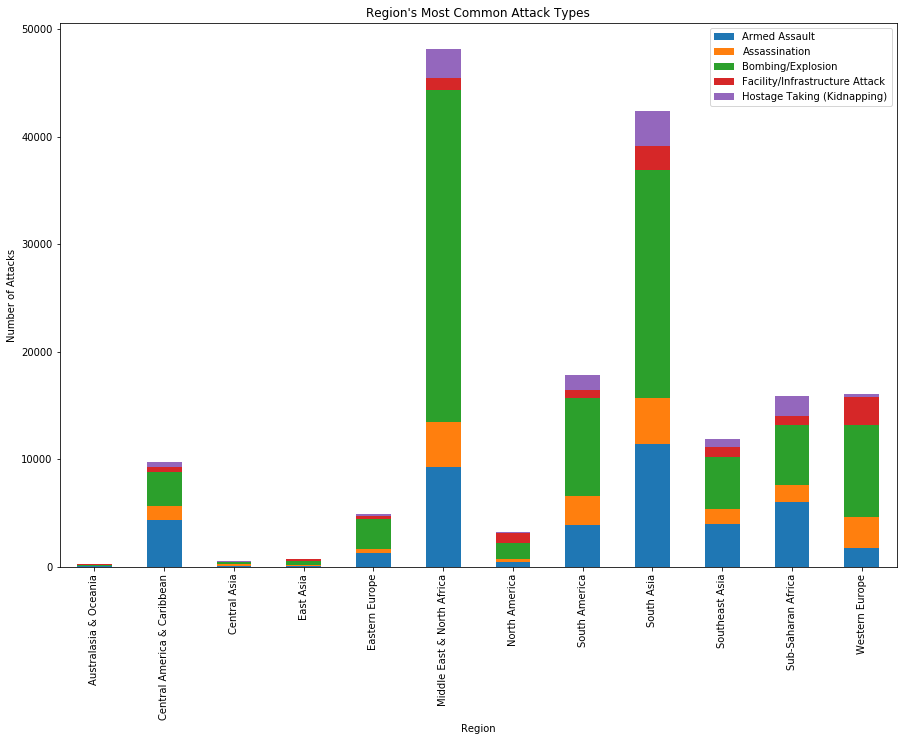

In [24]:
Region_Attack = pd.DataFrame(gtd, columns = ["eventid", "attacktype1_txt", "region_txt"])

Region_Count = Region_Attack.groupby(["attacktype1_txt"]).count()
Region_Count = Region_Attack.sort_values(by="eventid", ascending=False)

Region_Count = Region_Attack[Region_Attack["attacktype1_txt"].isin(["Bombing/Explosion", "Armed Assault", "Assassination", "Hostage Taking (Kidnapping)","Facility/Infrastructure Attack"])]
Region_Count = Region_Count.groupby(["region_txt", "attacktype1_txt"]).count()

Region_Count.unstack(level=1)

Region_Count.reset_index(inplace = True)

Region_Graph= Region_Count.groupby(["region_txt", "attacktype1_txt"]).max()["eventid"].unstack().plot(kind="bar", stacked=True, figsize=(15,10))

plt.ylabel("Number of Attacks")
plt.xlabel("Region")
plt.title("Region's Most Common Attack Types")
plt.legend(title="")

plt.savefig("Images/RegionTypeBar1.png")

plt.show()

# Most Popular Weapon by Region

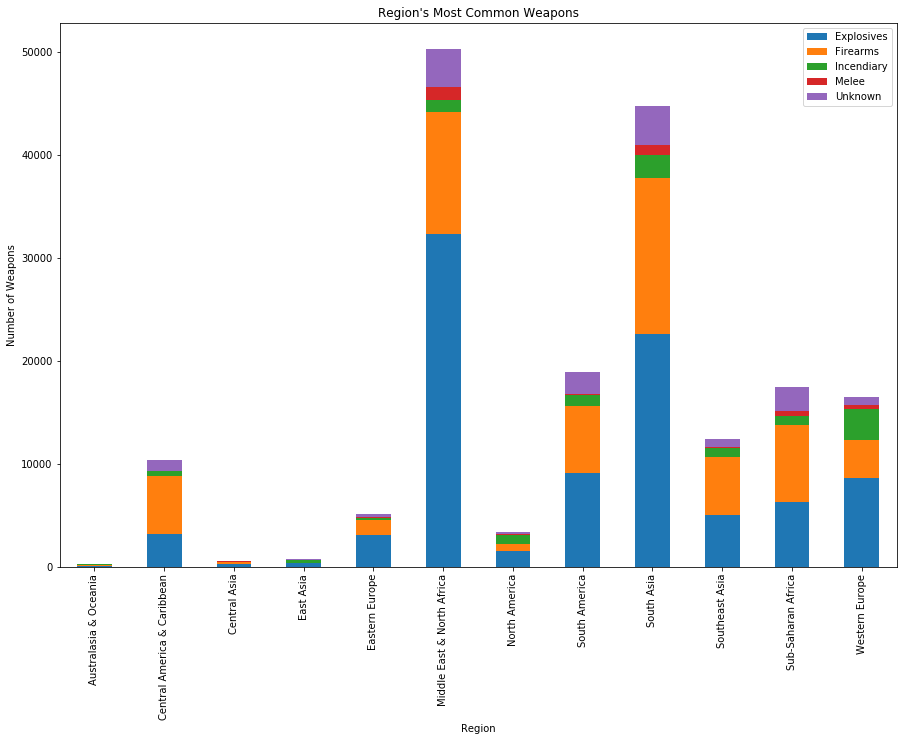

In [25]:
Region_Weapon = pd.DataFrame(gtd, columns = ["eventid", "weaptype1_txt", "region_txt"])

Weapon_Count = Region_Weapon.groupby(["weaptype1_txt"]).count()
Weapon_Count = Region_Weapon.sort_values(by="eventid", ascending=False)

Weapon_Count = Weapon_Count[Weapon_Count["weaptype1_txt"].isin(["Explosives", "Firearms", "Unknown", "Incendiary", "Melee"])]
Weapon_Count = Weapon_Count.groupby(["region_txt", "weaptype1_txt"]).count()

Weapon_Count.unstack(level=1)

Weapon_Count.reset_index(inplace = True)

Weapon_Graph= Weapon_Count.groupby(["region_txt", "weaptype1_txt"]).max()["eventid"].unstack().plot(kind="bar", stacked=True, figsize=(15,10))

plt.ylabel("Number of Weapons")
plt.xlabel("Region")
plt.title("Region's Most Common Weapons")
plt.legend(title="")

plt.savefig("Images/RegionWeaponBar1.png")

plt.show()

# Most Common Target by Region

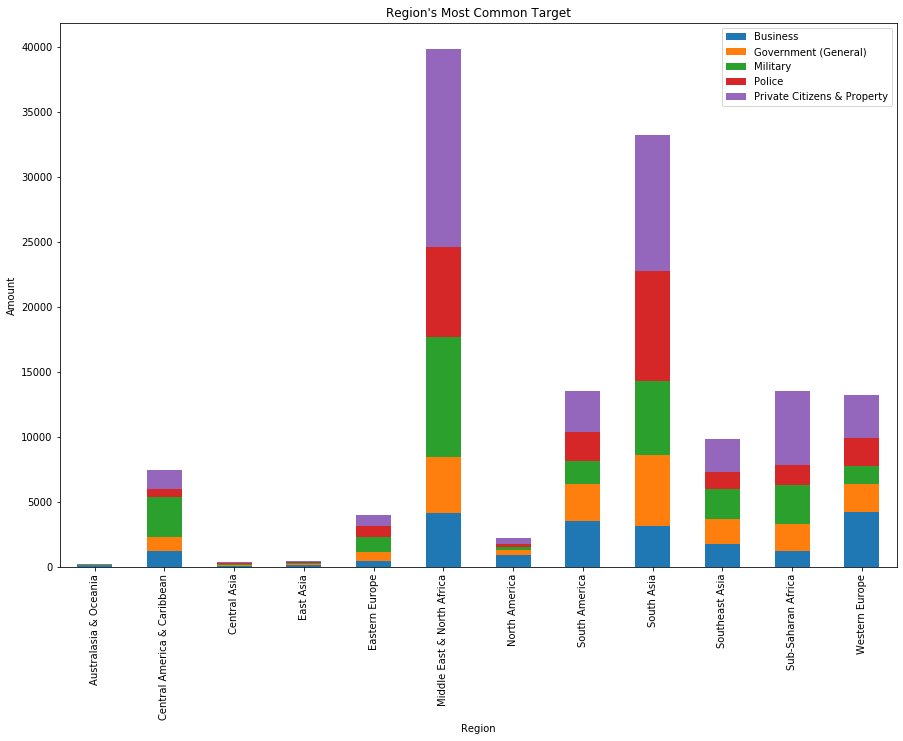

In [26]:
Region_Target = pd.DataFrame(gtd, columns = ["eventid", "targtype1_txt", "region_txt"])

Target_Count = Region_Target.groupby(["targtype1_txt"]).count()
Target_Count = Region_Target.sort_values(by="eventid", ascending=False)

Target_Count = Target_Count[Target_Count["targtype1_txt"].isin(["Private Citizens & Property", "Military", "Police", "Government (General)", "Business"])]
Target_Count = Target_Count.groupby(["region_txt", "targtype1_txt"]).count()

Target_Count.unstack(level=1)

Target_Count.reset_index(inplace = True)

Target_Graph= Target_Count.groupby(["region_txt", "targtype1_txt"]).max()["eventid"].unstack().plot(kind="bar", stacked=True, figsize=(15,10))

plt.ylabel("Amount")
plt.xlabel("Region")
plt.title("Region's Most Common Target")
plt.legend(title="")

plt.savefig("Images/RegionTargetBar1.png")

plt.show()